<a href="https://colab.research.google.com/github/123-VARSHA/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [381]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
# sklearn Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [383]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
# Defining the file path
df = pd.read_csv('/content/drive/MyDrive/Module 4/Coronavirus Sentiment Classification Project/Copy of Coronavirus Tweets.csv',encoding="ISO-8859-1")

##Data Inspection

In [385]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [386]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [387]:
df.shape

(41157, 6)

# Feature Engineering

## Step 1 Convert to LowerCase

In [388]:
df['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [389]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()

In [390]:
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

## Step 2 Removing Punctuations

In [391]:
type(df['OriginalTweet'])

pandas.core.series.Series

In [392]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [393]:
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [394]:

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [395]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)

In [396]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [397]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [398]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

## Step 3 Remove Stop Words

In [399]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [400]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [401]:
df['clean_tweets'][10]

'month hasnt crowding supermarkets restaurants however reducing hours closing malls means everyone using entrance dependent single supermarket manila lockdown covid philippines'

In [402]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,ready go supermarket covid outbreak im paranoi...


# Exploratory Data Analysis

In [403]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   clean_tweets   41157 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


In [405]:
# find the null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
clean_tweets        0
dtype: int64

In [406]:
# drop the null values
df.dropna(inplace=True)
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
clean_tweets     0
dtype: int64

In [407]:
df.shape

(32567, 7)

In [408]:
# count of Location
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [409]:
# count of Sentiments
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [410]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


##Graphical Representation of Sentiment Column

Text(0, 0.5, 'count')

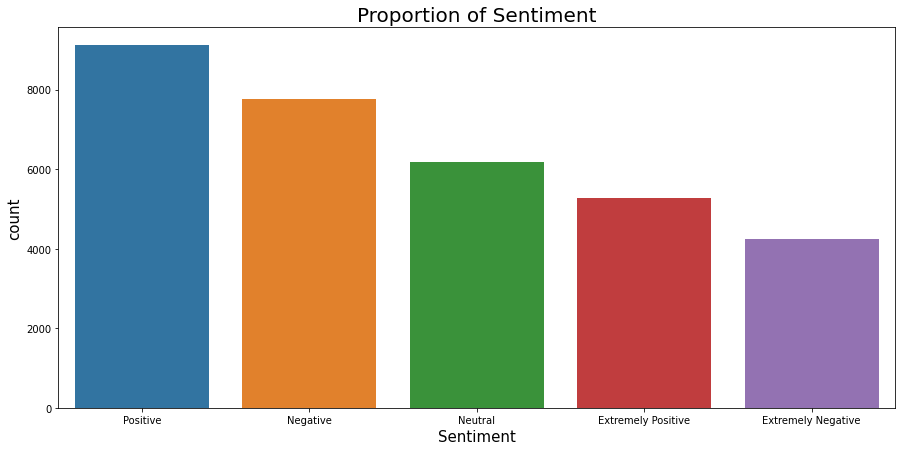

In [411]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=15)
ax.set_ylabel('count', fontsize=15)

In [412]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [413]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


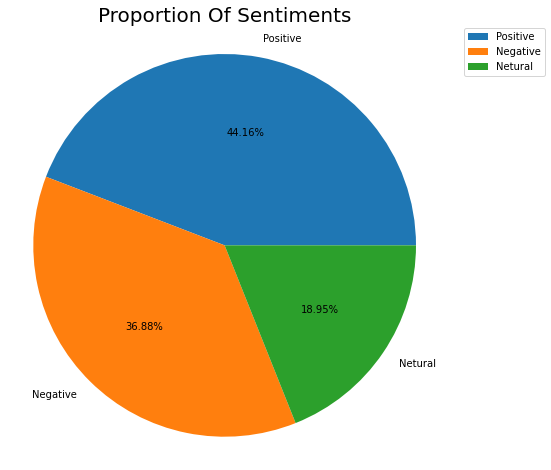

In [414]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##Unique values in each column

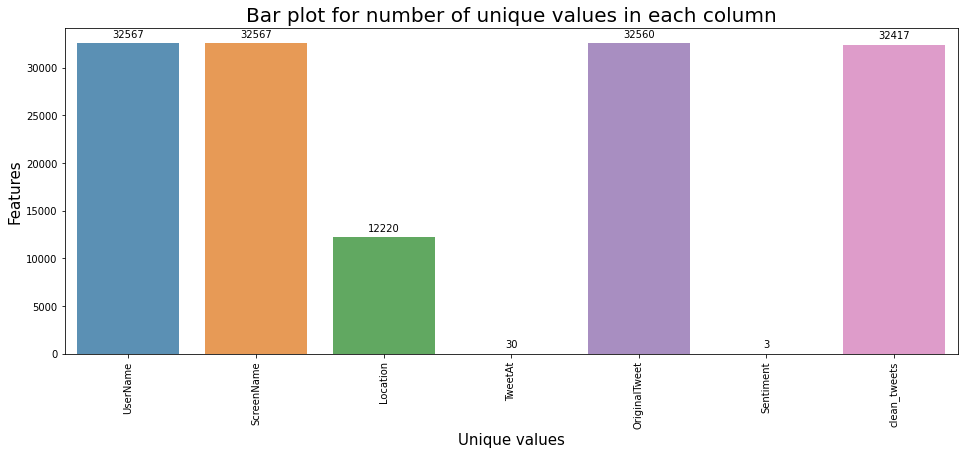

In [415]:
# finding unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique = []
for i in df.columns :
  unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(16,6))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches :
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column', fontsize=20)
plt.xlabel('Unique values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

## Countplot for original tweet according to TweetAt column

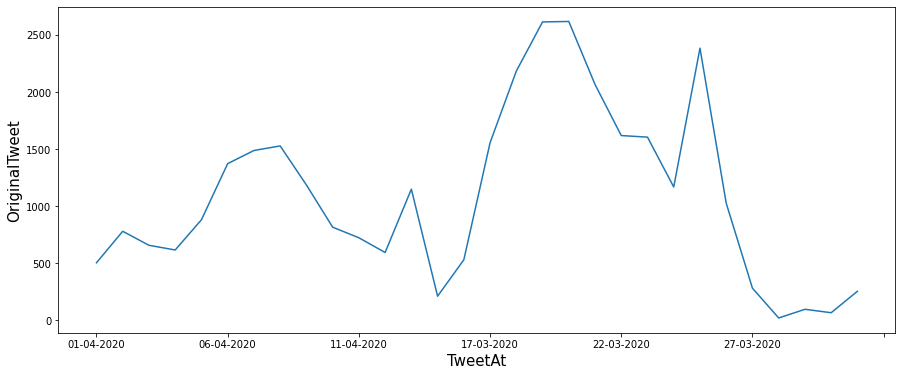

In [416]:
# plotting original tweet according to "TweetAt" column
plt.figure(figsize=(15,6))
grp_tweet = df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.xlabel('TweetAt', fontsize=15)
plt.ylabel('OriginalTweet', fontsize=15)
plt.show()

##Histogram Plot of OriginalTweet

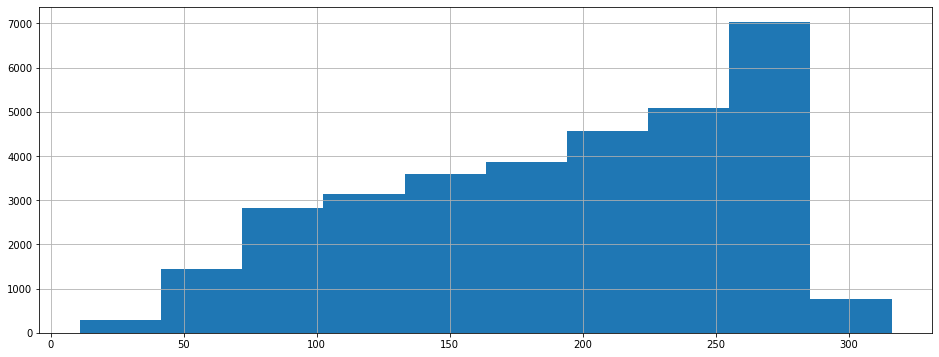

In [417]:
# plotting "OriginalTweet" column
plt.figure(figsize=(16,6))
plt.grid()
plt.hist(df['OriginalTweet'].str.len())
plt.show()

##Top 10 Locations

In [418]:
# getting top 10 locations
top10_location = df['Location'].value_counts().sort_values(ascending = False)[:10]
top10_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

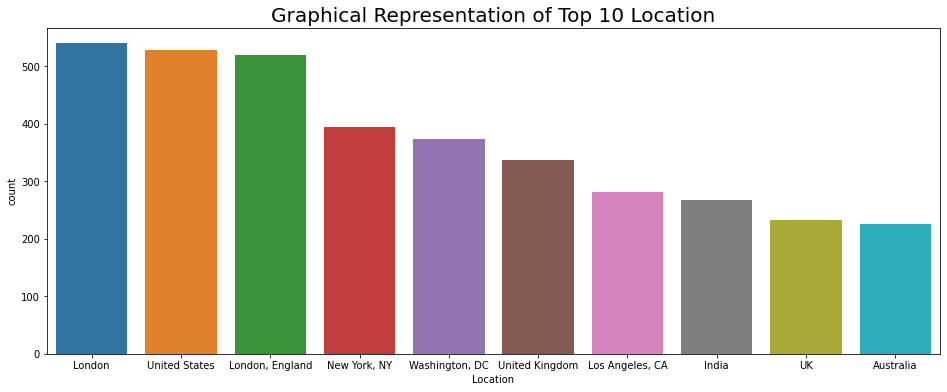

In [419]:
# plotting top 10 location in graaph
plt.figure(figsize=(16,6))
plt.title('Graphical Representation of Top 10 Location', fontsize = 20)
sns.countplot(data = df[df['Location'].isin(top10_location.index)], x='Location', order=top10_location.index)

In [420]:
df['clean_tweets'].head(15)

0                           menyrbie philgahan chrisitv
1     advice talk neighbours family exchange phone n...
2     coronavirus australia woolworths give elderly ...
5     news region first confirmed covid case came su...
6     cashier grocery store sharing insights covid p...
7     supermarket today didnt buy toilet paper rebel...
8     due covid retail store classroom atlanta open ...
9     corona preventionwe stop buy things cash use o...
10    month hasnt crowding supermarkets restaurants ...
11    due covid situation increased demand food prod...
12    horningsea caring community let look less capa...
13    dont need stock food ill amazon deliver whatev...
15    lines grocery store unpredictable eating safe ...
16                                                     
17    eyeonthearctic mar russia consumer surveillanc...
Name: clean_tweets, dtype: object

## Most Common words

In [421]:
from collections import Counter

In [422]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [423]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,coronavirus,14386
2,prices,6194
3,food,5522
4,supermarket,5432
5,store,5314
6,grocery,4882
7,people,4196
8,amp,4065
9,consumer,3718
10,shopping,2870


In [424]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Most Common Words in tweets')
fig.show()

# **Model Training**

##Train - Test Split

In [425]:
# specify input and output attributes
x = df.clean_tweets
y = df.Sentiment
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [426]:
tvec = TfidfVectorizer()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24425,), (24425,), (8142,), (8142,))

##Model1 - Logistic Regression

In [427]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model1 = Pipeline([('vectorizer', tvec), ('classifier', LR)])
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [428]:
# model prediction
y_pred_LR = model1.predict(x_test)

##Model2 - Decision Tree Classifier

In [429]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
model2 = Pipeline([('vectorizer', tvec), ('classifier', DTC)])
model2.fit(x_train, y_train)

y_pred_DTC = model2.predict(x_test)

##Model3 - Random Forest Classifier

In [430]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model3 = Pipeline([('vectorizer', tvec), ('classifier', RFC)])
model3.fit(x_train, y_train)

y_pred_RFC = model3.predict(x_test)

##Model4 - Gradient Boosting Classifier

In [431]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
model4 = Pipeline([('vectorizer', tvec), ('classifier', GBC)])
model4.fit(x_train, y_train)

y_pred_GBC = model4.predict(x_test)

##Model5 - Passive Aggressive Classifier

In [432]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier()
model5 = Pipeline([('vectorizer', tvec), ('classifier', PAC)])
model5.fit(x_train, y_train)

y_pred_PAC = model5.predict(x_test)

# Performance Metrics and Accuracy

In [433]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Performance of Logistic Regression Model

In [434]:
print('Accuracy : ', accuracy_score(y_pred_LR, y_test))
print('Precision : ', precision_score(y_pred_LR, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_LR, y_test, average = 'weighted'))

Accuracy :  0.7710636207320068
Precision :  0.7857896154337569
Recall :  0.7710636207320068


Performance of Decision Tree Classifier

In [435]:
print('Accuracy : ', accuracy_score(y_pred_DTC, y_test))
print('Precision : ', precision_score(y_pred_DTC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_DTC, y_test, average = 'weighted'))

Accuracy :  0.6129943502824858
Precision :  0.6109013482361811
Recall :  0.6129943502824858


Performance of Random Forest Classifier

In [436]:
print('Accuracy : ', accuracy_score(y_pred_RFC, y_test))
print('Precision : ', precision_score(y_pred_RFC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_RFC, y_test, average = 'weighted'))

Accuracy :  0.7248833210513388
Precision :  0.7282331957151178
Recall :  0.7248833210513388


Performance of Gradient Boosting Classsifier

In [437]:
print('Accuracy : ', accuracy_score(y_pred_GBC, y_test))
print('Precision : ', precision_score(y_pred_GBC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_GBC, y_test, average = 'weighted'))

Accuracy :  0.6545074920167036
Precision :  0.6962747491301503
Recall :  0.6545074920167036


Performance of Passive Aggressive Classifier

In [438]:
print('Accuracy : ', accuracy_score(y_pred_PAC, y_test))
print('Precision : ', precision_score(y_pred_PAC, y_test, average = 'weighted'))
print('Recall : ', recall_score(y_pred_PAC, y_test, average = 'weighted'))

Accuracy :  0.7563252272169
Precision :  0.757026798471969
Recall :  0.7563252272169


##Confusion Matrix

In [439]:
from sklearn.metrics import confusion_matrix

[[2444  335  373]
 [ 174  822  157]
 [ 437  388 3012]]


[Text(0, 0.5, 'OriginalTweet'), Text(0, 1.5, 'Sentiment')]

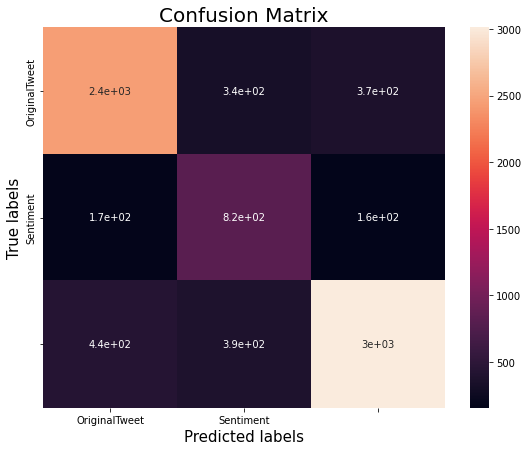

In [440]:
# Get the confusion matrix 

y_pred_LR = model1.predict(x_test)

labels = ['OriginalTweet', 'Sentiment']
cm = confusion_matrix(y_pred_LR, y_test)
print(cm)

plt.figure(figsize=(9,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Conclusion**

##Conclusion On EDA

---

*   Original Dataset contains 6 columns and 41157 rows.
*   Location column contains null values. So, we have dropped the null values.
*   After dropping we are left with 6 columns and 32567 rows. 
*   In order to analyse the data we required only two columns "OriginalTweet" and "Sentiment".
*   The columns such as "UserName" and "ScreenName" does not give any meaningful insights for our analysis.
*   There are five types of sentiments - Extremely Positive, Positive, Extremely Negative, Negative and Neutral.
*   We have renamed the Extremely Positive and Extremely Negative sentiments to Positive and Negative respectively. And we are left with three types of sentiments - Positive, Negative and Neutral.
*  The pie chart shows the proportion of sentiments. 
*   Bar plot for unique values shows us the number of unique values in each column.
*   The graphical representation of top 10 locations shows us that most of the tweets came from London followed by United States.

##Conclusion On Model Training

---
*   At the end we conclude our classification project with five models namely - Logistic Regression Model, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier and Passive Aggressive Classifier.
*   We are getting the highest accuracy of about 77% with Logistic Regression.











